# Phase kickback

Phase kickback is a very useful trick which is achieved with the help of the controlled quantum gates. It is used in many quantum algorithms, such as Deutch's alogrithm, Grover searrch algorithm, Shor's algorithm

Applying a quantum gate in a quantum register, if the register is its eigenstate, then the action of the gate will add a global phase to the register

$$ U \ket{x} = e^{2 \pi i \theta} \ket{x} $$

If this operation is controlled with a controlled gate CU by another gate that is in superposition of |0> and |1>, this will has the effect of rotating the qubit arounf Z-axis

$$ CU (a\ket{0} + b\ket{1}) \ket{x} =(a\ket{0} + b e^{2\pi i \theta} \ket{1}) \ket{x}) $$

An classic example is the CNOT gate

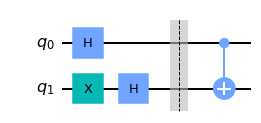

In [56]:
from qiskit import QuantumCircuit, transpile
from qiskit import BasicAer
from qiskit.visualization import plot_state_city, plot_bloch_multivector, plot_bloch_vector, plot_histogram
from qiskit.visualization import plot_state_paulivec, plot_state_hinton
from qiskit.visualization import plot_state_qsphere

# create the quantum circuit
circuit = QuantumCircuit(2)

# put qubit 0 in superposition
circuit.h(0)

# put qubit 1 in |-> state
circuit.x(1)
circuit.h(1)

circuit.barrier()

# apply the cnot gate, with qubit 0 the control qubit and qubit 1 the target qubit
circuit.cnot(0, 1)

%matplotlib inline
circuit.draw(output = 'mpl')

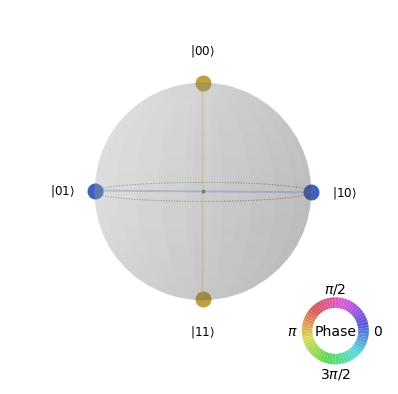

In [57]:
# execute the circuit
backend = BasicAer.get_backend('statevector_simulator') # the device to run on
result = backend.run(transpile(circuit, backend)).result()
psi  = result.get_statevector(circuit)

plot_state_qsphere(psi)

After the phase kickback effect the state of the system is

$$ CNOT (a\ket{0} + b\ket{1}) \ket{-} = (a\ket{0} - b \ket{1}) \ket{-}) $$

Vector |-> is an eigenvector of X gate, with eigenvalue -1, the state |-> stays untouched and the -1 goes only in amplitude of state |1> of the 1st qubit,
since CNOT is a controlled gate and X is applied only when control qubit is |1>